In [1]:
from flash_ansr import FlashANSR, GenerationConfig, install_model, get_path
 
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:
from drawdata import ScatterWidget

In [3]:
# MODEL = "psaegert/flash-ansr-v21.0-60M"
MODEL = "ansr-models/v21.0-60M" # /checkpoint_250000

In [4]:
# install_model(MODEL)

In [5]:
nsr = FlashANSR.load(
    directory=get_path('models', MODEL),
    # generation_config=GenerationConfig(method='beam_search', beam_width=1024 * 32, equivalence_pruning=True),
    generation_config=GenerationConfig(method='softmax_sampling', choices=1024, max_len=48),
    # generation_config=GenerationConfig(method='mcts', beam_width=1024, simulations=1024 * 32, temperature=1),
    parsimony=0.02
).to(device)

In [6]:
widget = ScatterWidget()
widget

ScatterWidget()

In [7]:
X_raw, y_raw = widget.data_as_X_y

# Scale X_raw and y_raw to (-10, 10)
X = (X_raw - X_raw.min(axis=0)) / (X_raw.max(axis=0) - X_raw.min(axis=0)) * 20 - 10
y = (y_raw - y_raw.min(axis=0)) / (y_raw.max(axis=0) - y_raw.min(axis=0)) * 20 - 10

In [8]:
nsr.fit(X, y, verbose=True, complexity=30)

Fitting Constants: 100%|██████████| 926/926 [00:01<00:00, 487.81it/s]


In [9]:
nsr.compile_results(parsimony=0.02)

In [10]:
nsr.get_expression(0)

'9.8 * sin(pow3(pow1_5(-0.26 * x1 * (sin(2.06 / x1) - 3.89))))'

In [15]:
nsr.results

,log_prob,fvu,score,expression,complexity,target_complexity,raw_beam,beam,raw_beam_decoded,function,refiner,prompt_metadata,beam_id,fit_constants,fit_covariances,fit_loss
0,-15.333341,0.032922,-1.182516,"[*, <constant>, sin, pow3, pow1_5, *, <constan...",15,30,"[1, 17, 6, 31, 24, 30, 17, 6, 17, 47, 16, 31, ...","[17, 6, 31, 24, 30, 17, 6, 17, 47, 16, 31, 18,...","[*, <constant>, sin, pow3, pow1_5, *, <constan...",<function <lambda> at 0x7d3d2cb08c20>,"Refiner(expression=['*', '<constant>', 'sin', ...","{'allowed_terms': [], 'include_terms': [], 'ex...",0,"[9.79503775626935, -0.26406987878764376, 2.059...","[[0.04133709492671475, -0.0009973654593167837,...",1.314529
1,-11.594007,0.040297,-1.174730,"[+, cos, /, <constant>, x1, *, <constant>, sin...",11,30,"[1, 15, 32, 18, 6, 47, 17, 6, 31, 30, 24, 47, ...","[15, 32, 18, 6, 47, 17, 6, 31, 30, 24, 47]","[+, cos, /, <constant>, x1, *, <constant>, sin...",<function <lambda> at 0x7d3d2ca78a40>,"Refiner(expression=['+', 'cos', '/', '<constan...","{'allowed_terms': [], 'include_terms': [], 'ex...",1,"[-1.4567536357766109, 9.67066031505002]","[[0.001203833336132279, 0.0001167402694371805]...",1.609002
2,-15.416535,0.041336,-1.163674,"[*, <constant>, sin, -, atan, x1, /, +, <const...",11,30,"[1, 17, 6, 31, 16, 36, 47, 18, 15, 6, 47, 6, 2...","[17, 6, 31, 16, 36, 47, 18, 15, 6, 47, 6]","[*, <constant>, sin, -, atan, x1, /, +, <const...",<function <lambda> at 0x7d3d2cb0afc0>,"Refiner(expression=['*', '<constant>', 'sin', ...","{'allowed_terms': [], 'include_terms': [], 'ex...",2,"[-9.817665455903427, -12.56392813607519, -3.84...","[[0.05181261458631829, 0.007967458431697036, 0...",1.650488
3,-12.400665,0.036135,-1.162076,"[*, <constant>, sin, *, x1, pow1_3, abs, /, <c...",14,30,"[1, 17, 6, 31, 17, 47, 28, 19, 18, 6, 15, 47, ...","[17, 6, 31, 17, 47, 28, 19, 18, 6, 15, 47, 32,...","[*, <constant>, sin, *, x1, pow1_3, abs, /, <c...",<function <lambda> at 0x7d3d2d496a20>,"Refiner(expression=['*', '<constant>', 'sin', ...","{'allowed_terms': [], 'include_terms': [], 'ex...",3,"[9.619092425270258, -0.702420847323303]","[[0.042182182743536537, 0.0005415436477328076]...",1.442814
4,-10.242363,0.040875,-1.148542,"[*, <constant>, sin, /, x1, pow1_5, -, <consta...",12,30,"[1, 17, 6, 31, 18, 47, 30, 16, 6, 15, 47, 23, ...","[17, 6, 31, 18, 47, 30, 16, 6, 15, 47, 23, 47]","[*, <constant>, sin, /, x1, pow1_5, -, <consta...",<function <lambda> at 0x7d3d2cb082c0>,"Refiner(expression=['*', '<constant>', 'sin', ...","{'allowed_terms': [], 'include_terms': [], 'ex...",4,"[-9.964964764596935, -0.7376374517694184]","[[0.05209852454812635, 0.015891572185928377], ...",1.632093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,-23.142681,6.968721,1.143153,"[*, sin, /, x1, atan, x1, +, <constant>, +, x1...",15,30,"[1, 17, 31, 18, 47, 36, 47, 15, 6, 15, 47, 28,...","[17, 31, 18, 47, 36, 47, 15, 6, 15, 47, 28, 26...","[*, sin, /, x1, atan, x1, +, <constant>, +, x1...",<function <lambda> at 0x7d3d2025a340>,"Refiner(expression=['*', 'sin', '/', 'x1', 'at...","{'allowed_terms': [], 'include_terms': [], 'ex...",797,"[1.321186795656076, -0.7329996178553785]","[[25.863410996469682, -5.090907330364596], [-5...",278.252759
798,-13.602924,13.265500,1.402724,"[*, x1, *, -, x1, <constant>, cos, pow1_3, +, ...",14,30,"[1, 17, 47, 17, 16, 47, 6, 32, 28, 15, 47, 32,...","[17, 47, 17, 16, 47, 6, 32, 28, 15, 47, 32, 18...","[*, x1, *, -, x1, <constant>, cos, pow1_3, +, ...",<function <lambda> at 0x7d3d2cbe3ce0>,"Refiner(expression=['*', 'x1', '*', '-', 'x1',...","{'allowed_terms': [], 'include_terms': [], 'ex...",798,"[3.427911019563636, 2.2416251227348285]","[[0.8685145796555448, -0.4090054496875201], [-...",529.675676
799,-23.292656,15.125428,1.479708,"[*, x1, *, -, <constant>, x1, sin, /, -, *, <c...",15,30,"[1, 17, 47, 17, 16, 6, 47, 31, 18, 16, 17, 6, ...","[17, 47, 17, 16, 6, 47, 31, 18, 16, 17, 6, 32,...","[*, x1, *, -, <constant>, x1, sin, /, -, *, <c...",<function <lambda> at 0x7d3d2072e020>,"Refiner

In [11]:
X_linspace = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

In [12]:
y_pred = [[nsr.predict(X, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]
y_pred_linspace = [[nsr.predict(X_linspace, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]

/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:173: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 5), x ** (1 / 5))
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:130: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 3), x ** (1 / 3))
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:522: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:161: RuntimeWarning: invalid value encountered in power
  return x ** 0.25


In [13]:
y_pred = y_pred[:32]
y_pred_linspace = y_pred_linspace[:32]

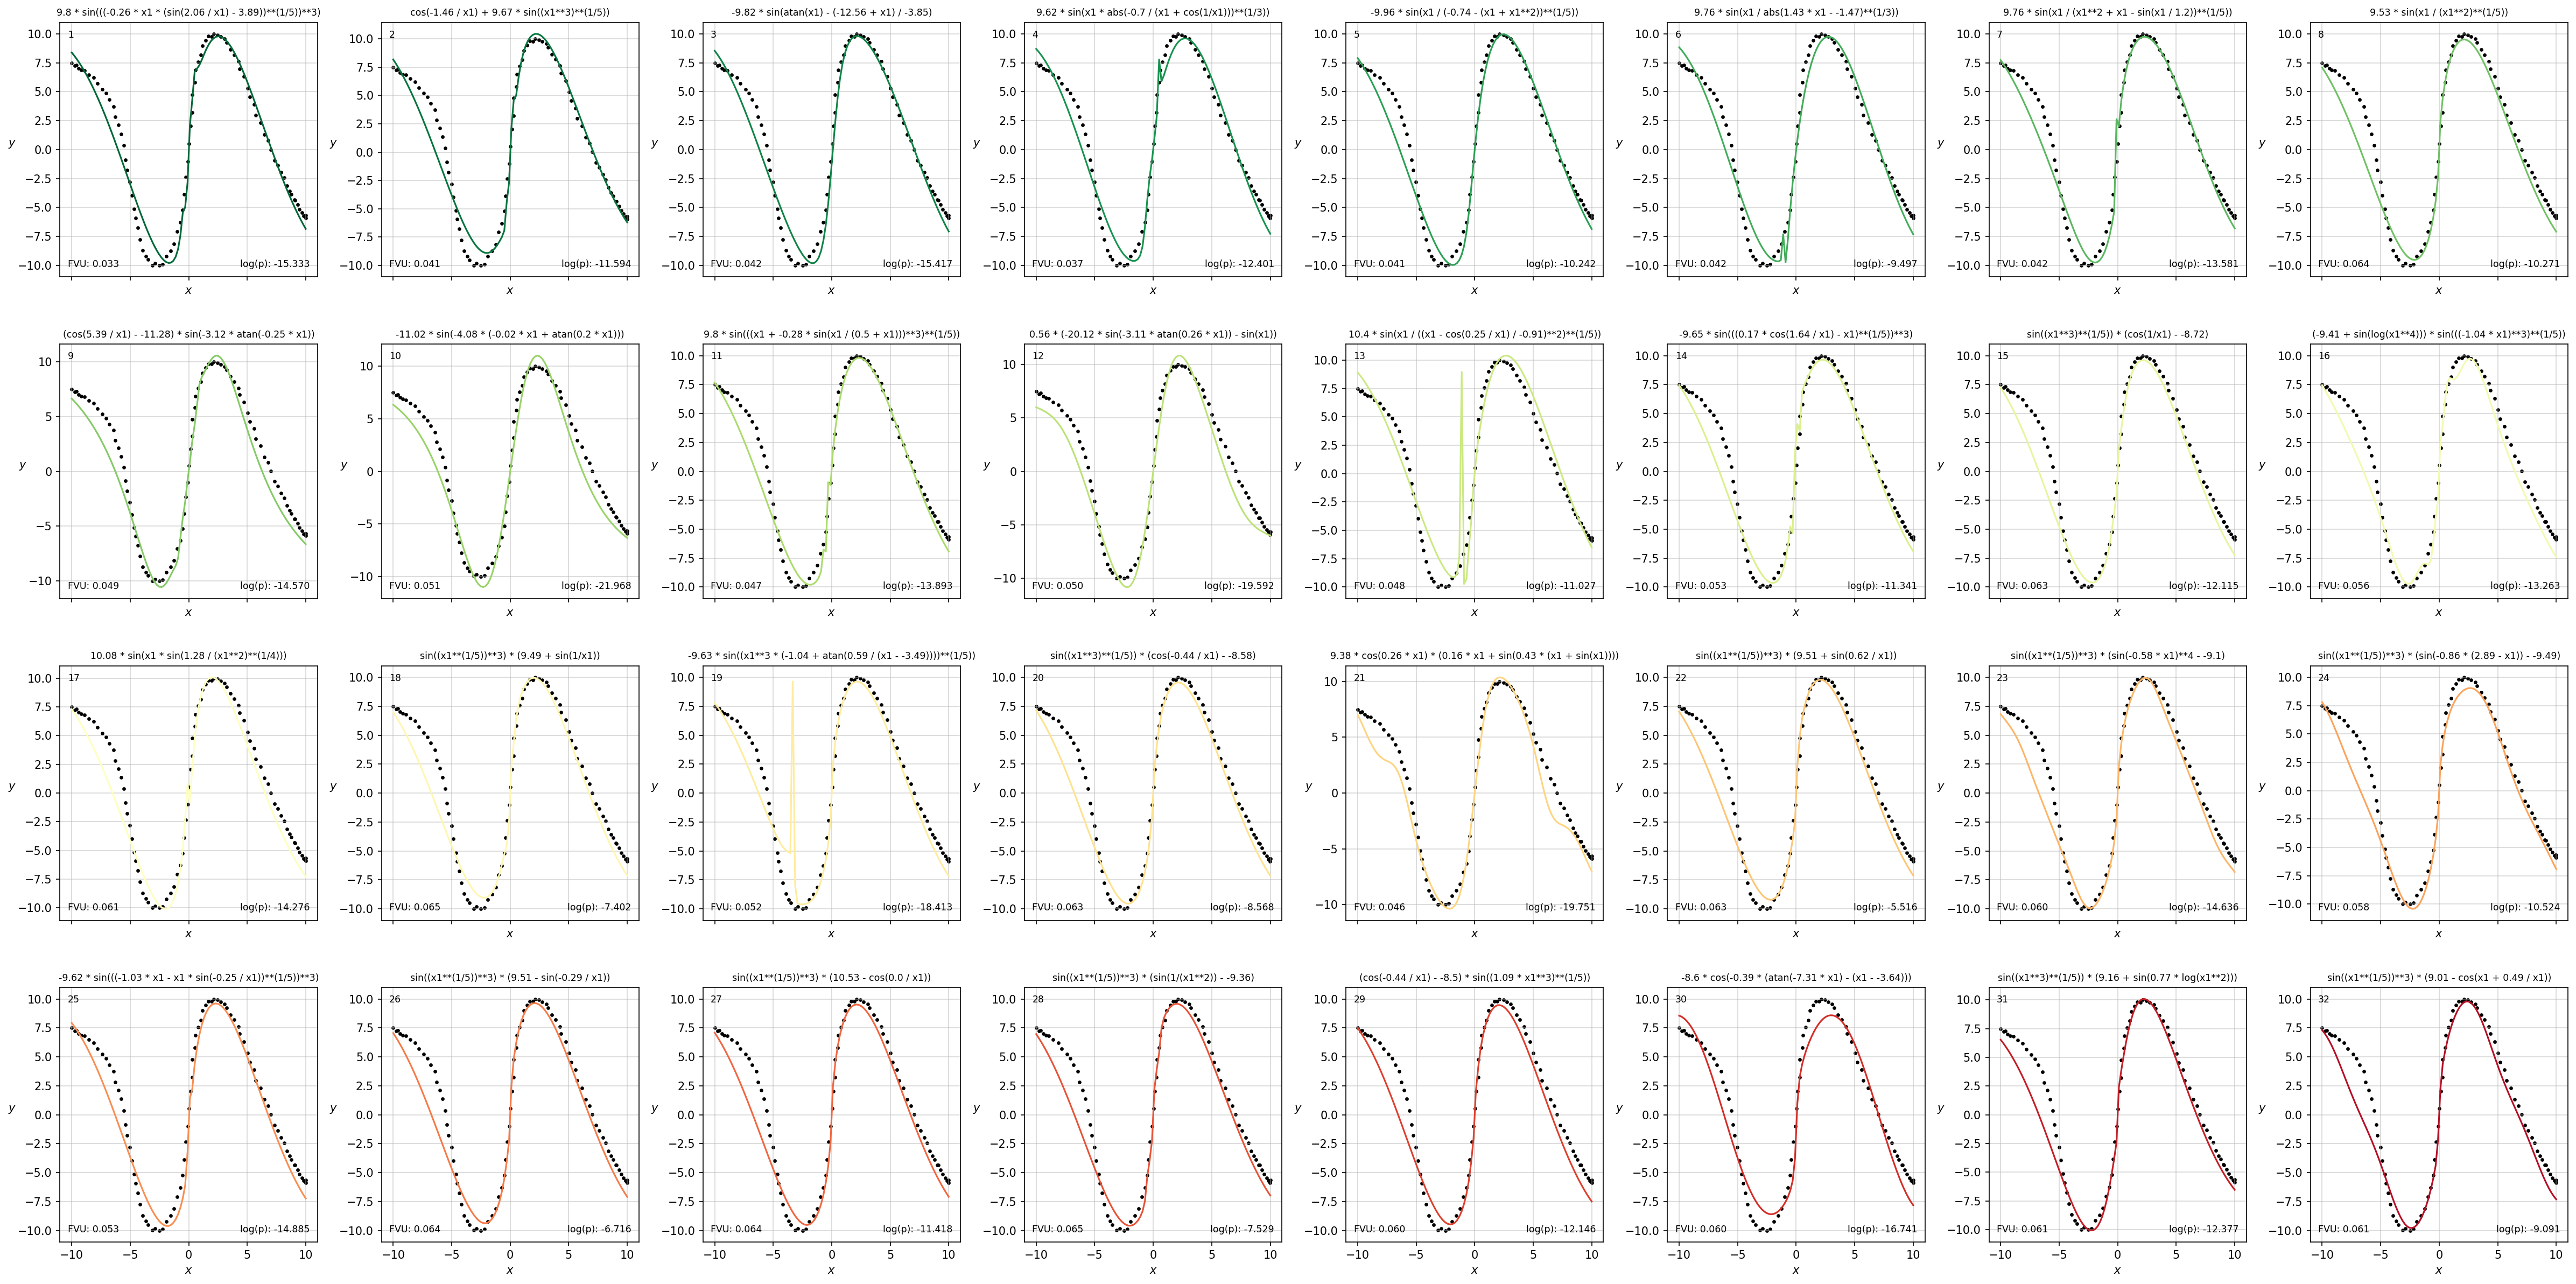

In [14]:
COLS = 8
ROWS = np.ceil(len(y_pred) / COLS).astype(int)

fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 4, ROWS * 4), dpi=150, sharex=True)

for i, ax in enumerate(axs.flat):
    if i >= len(y_pred) or len(y_pred[i]) == 0:
        ax.axis('off')
        continue
    fvu = np.mean((y_pred[i][0][:, 0] - y)**2) / np.var(y)
    expression_pred_transformed = nsr._results[i]['refiner'].transform(nsr._results[i]['expression'], 0, return_prefix=True)
    expression_pred_transformed_infix = nsr.simplipy_engine.prefix_to_infix(expression_pred_transformed, power='**')

    ax.plot(X_linspace, y_pred_linspace[i][0], color=plt.get_cmap('RdYlGn')(1 - i / len(y_pred)))
    ax.scatter(X, y, color='k', s=5)
    ax.set_title(expression_pred_transformed_infix, fontsize='small')
    
    ax.annotate(f'{i + 1}', xy=(0.03, 0.97), xycoords='axes fraction', ha='left', va='top', fontsize='small')
    ax.annotate(f'FVU: {fvu:.3f}', xy=(0.03, 0.03), xycoords='axes fraction', ha='left', va='bottom', fontsize='small')
    ax.annotate(f'log(p): {nsr._results[i]["log_prob"]:.3f}', xy=(0.97, 0.03), xycoords='axes fraction', ha='right', va='bottom', fontsize='small')

    ax.grid(alpha=0.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$', rotation=0, labelpad=5)

fig.tight_layout(h_pad=3)

Text(0, 0.5, 'Log Probability')

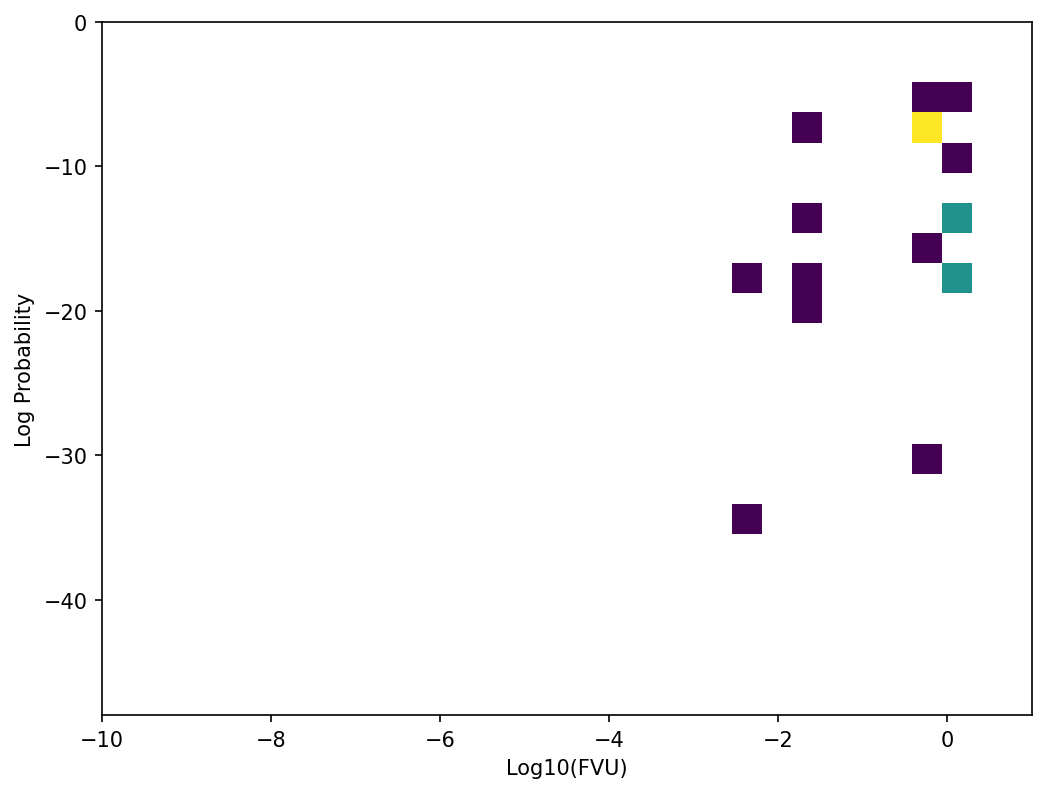

In [19]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.log10(nsr.results['fvu']), nsr.results['log_prob'], bins=(np.linspace(-10, 1, 32), np.linspace(-48, 0, 24)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Log Probability')

Text(0, 0.5, 'Log Probability')

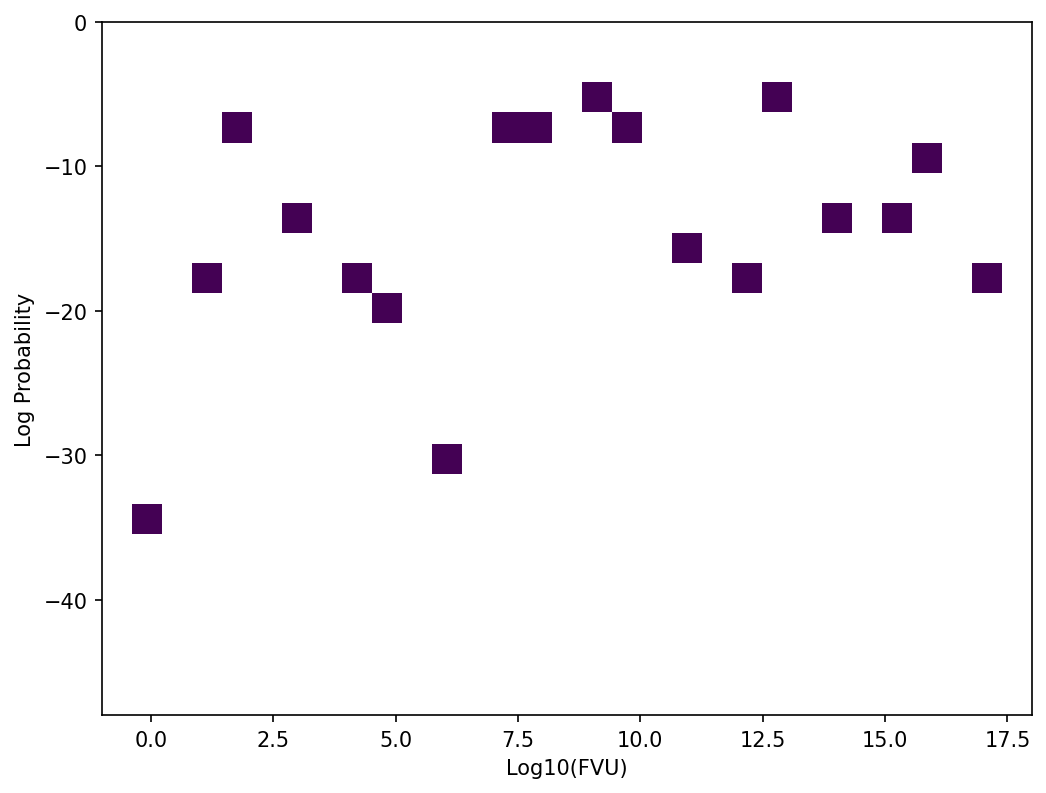

In [20]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.argsort(nsr.results['fvu']), nsr.results['log_prob'], bins=(np.linspace(-1, len(nsr.results), 32), np.linspace(-48, 0, 24)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Log Probability')

Text(0, 0.5, 'Complexity')

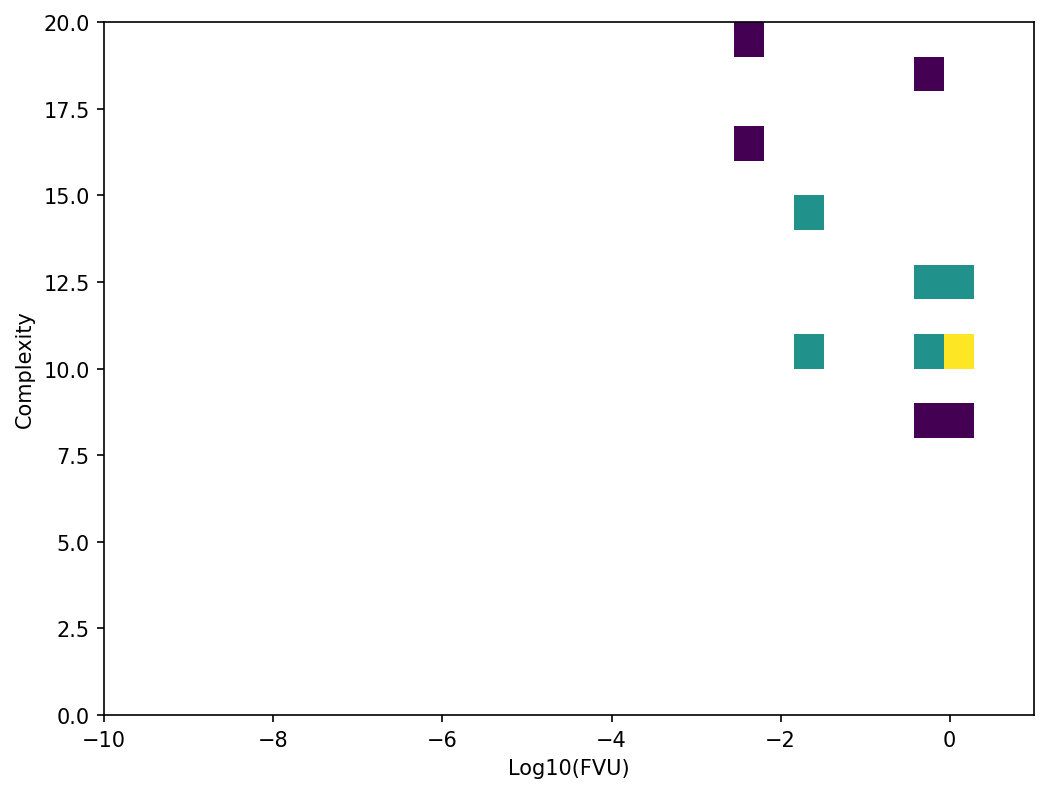

In [21]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.log10(nsr.results['fvu']), nsr.results['complexity'], bins=(np.linspace(-10, 1, 32), np.linspace(0, 20, 21)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Complexity')